In [1]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/weather-prediction/weather_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
None
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07        

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Handling missing values (if any)
df.dropna(inplace=True)

# Select features and target variable (Modify this based on your dataset)
features = df.drop(columns=["TOURS_temp_max"])  # Replace with actual target column
target = df["TOURS_temp_max"]  # Replace with actual target column

# Normalize data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape data for CNN (assuming sequential time-series data)
X = features_scaled.reshape(features_scaled.shape[0], features_scaled.shape[1], 1)  # (samples, features, 1)
y = target.values  # Ensure target is in NumPy array format

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression (adjust for classification if needed)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 162, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 81, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 79, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 39, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          79,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,433 (337.63 KB)

 Trainable params: 86,433 (337.63 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 140.5729 - mae: 9.2036 - val_loss: 16.8546 - val_mae: 3.2156
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 19.0664 - mae: 3.4115 - val_loss: 8.0157 - val_mae: 2.2665
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 12.7502 - mae: 2.7742 - val_loss: 6.5587 - val_mae: 1.9854
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 12.9849 - mae: 2.8276 - val_loss: 6.2339 - val_mae: 1.9556
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 12.8940 - mae: 2.7571 - val_loss: 5.3515 - val_mae: 1.7923
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 11.1866 - mae: 2.5890 - val_loss: 6.4688 - val_mae: 2.0036
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.7411 - mae: 2.6518 - val_loss: 4.9654 - val_mae: 1.7321
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 11.1454 - mae: 2.5553 - val_loss: 9.1631 - val_mae: 2.5180
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.

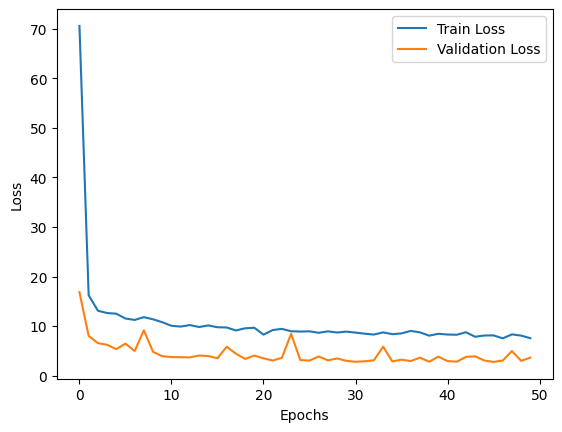

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7138 - mae: 1.5009
Test Loss: 3.634493112564087, Test MAE: 1.4950058460235596


In [5]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


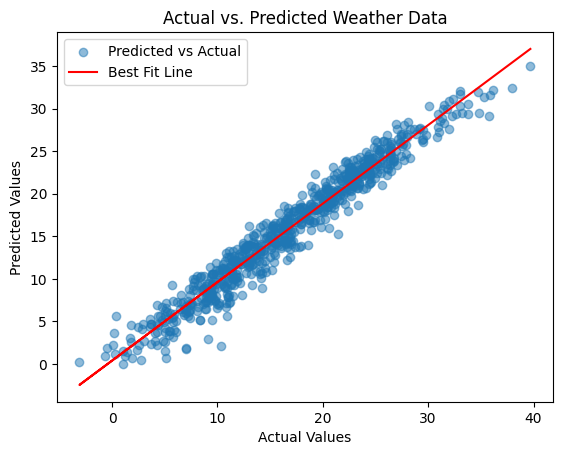

In [6]:
# Make predictions
predictions = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, predictions, label="Predicted vs Actual", alpha=0.5)

# Fit a line to the predictions
m, b = np.polyfit(y_test, predictions.flatten(), 1)  # Linear regression line
plt.plot(y_test, m * y_test + b, color='red', label="Best Fit Line")  # Regression line

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Weather Data")
plt.legend()

# Show plot
plt.show()



In [7]:
model.save("weather_cnn_model.h5")
